# Sanity Check -- am I saneeee

In [1]:
import json
import os
import plotly.express as px
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
data_paths = ["data/new1.json", "data/new2.json", "data/new3.json", "data/new4.json", "data/new5.json", "data/new6.json",]

In [3]:
old_data_paths = ["data/ns_subreddit_2021-01.json", "data/ns_subreddit_2021-02.json", "data/ns_subreddit_2021-03.json", 
                  "data/ns_subreddit_2021-04.json", "data/ns_subreddit_2021-05.json", "data/ns_subreddit_2021-06.json"]

In [34]:
def mapto5(n):
    if n == 0:
        return 0
    elif n > 0 and n <= 1:
        return 1
    elif n > 1 and n <= 5:
        return 2
    elif n > 5 and n <= 10:
        return 3
    elif n > 10 and n <= 500:
        return 4
    elif n > 500:
        return 5

In [35]:
def make_rating_dict():
    print("=== Cleaning data ===")
    current_dict = dict()
    for path in old_data_paths:
        nssr = json.load(open(path))
        newssources = nssr.keys()
        for ns in newssources:
            subreddits = nssr[ns].keys()
            for sr in subreddits:
                if ns in current_dict and sr in current_dict[ns]:
                    current_dict[ns][sr] += nssr[ns][sr][0]
                elif ns in current_dict:
                    current_dict[ns][sr] = nssr[ns][sr][0]
                else:
                    current_dict[ns] = dict()
                    current_dict[ns][sr] = nssr[ns][sr][0]
        print(f"done for {path}")
    return current_dict

In [36]:
def filter_data(current_dict):
    # popular = set() 
    # newssources = list(current_dict.keys())
    # threshold = 5000
    # for ns in newssources:
    #     for sr in current_dict[ns]:
    #         if current_dict[ns][sr] > threshold:
    #             popular.add(ns)

    # filtered = {k:v for k,v in current_dict.items() if k not in popular}
    # filtered_newssources = set(filtered.keys())
    # filtered_subreddits = set() 
    # for ns in filtered_newssources:
    #     filtered_subreddits = filtered_subreddits | set(filtered[ns].keys())
    # nonsub = [s for s in filtered_subreddits if s[:2] == "u_"]

    subreddits = set() 
    for ns in list(current_dict.keys()):
        subreddits |= set(current_dict[ns].keys())
    nonsub = [s for s in subreddits if s[:2] == "u_"]
    # yf = pd.DataFrame.from_dict(filtered)
    yf = pd.DataFrame.from_dict(current_dict)
    yf.fillna(0, inplace=True)
    yf_df = yf.drop(nonsub)

    yf_df = yf_df.loc[(yf_df.sum(axis=1) != 0), (yf_df.sum(axis=0) != 0)]
    # yf_df = yf.loc[(yf.sum(axis=1) != 0), (yf.sum(axis=0) != 0)]

    print(f"dimension: {yf_df.shape}")
    return yf_df

In [37]:
def map_all_to_5(df):
    return df.applymap(mapto5)

In [38]:
def make_rating_list(yf_df):
    print("=== Making rating list ===")
    reddit_data = []
    final_dict = yf_df.to_dict()
    # creating identifiers
    subreddits = list(yf_df.index)
    newssources = list(yf_df.columns)
    ns_id = {ns: i for i, ns in enumerate(newssources)}
    id_ns = {i: ns for i, ns in enumerate(newssources)}
    subreddit_id = {sr: i for i, sr in enumerate(subreddits)}
    id_subreddit = {i: sr for i, sr in enumerate(subreddits)}
    json.dump(ns_id, open("data/new_ns_id5.json", "w"), indent=4)
    json.dump(id_ns, open("data/new_id_ns5.json", "w"), indent=4)
    json.dump(subreddit_id, open("data/new_subreddit_id5.json", "w"), indent=4)
    json.dump(id_subreddit, open("data/new_id_subreddit5.json", "w"), indent=4)
    print("--- identifiers created ---")
    # ns_id = json.load(open("data/ns_id.json"))
    # subreddit_id = json.load(open("data/subreddit_id.json"))
    for ns in final_dict:
        for s in final_dict[ns]:
            rating = int(final_dict[ns][s])
            newssource_idx = ns_id[ns]
            subreddit_idx = subreddit_id[s]
            reddit_data.append([subreddit_idx, newssource_idx, rating])
    print("=== rating list made ===")
    return np.array(reddit_data)

In [22]:
current_dict = make_rating_dict()

=== Cleaning data ===
done for data/ns_subreddit_2021-01.json
done for data/ns_subreddit_2021-02.json
done for data/ns_subreddit_2021-03.json
done for data/ns_subreddit_2021-04.json
done for data/ns_subreddit_2021-05.json
done for data/ns_subreddit_2021-06.json


In [24]:
# current_dict["breitbart.com"]

In [25]:
df = filter_data(current_dict)

dimension: (69478, 1595)


In [39]:
df5 = map_all_to_5(df)

/var/folders/jn/8pwp1p_s6y5g86xhckcf_9yh0000gn/T/ipykernel_5136/2844669417.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(mapto5)


In [40]:
reddit_data = make_rating_list(df5)

=== Making rating list ===
--- identifiers created ---
=== rating list made ===


In [41]:
df5.head()

wikipedia.org  espn.com  yahoo.com  reuters.com  \
RidiculousKanji                   1         0          0            0   
teslamotors                       4         0          4            4   
phish                             4         0          2            0   
footballmanagergames              4         2          0            0   
wikipedia                         5         0          0            0   

                      sbs.com.au  cnn.com  engadget.com  blogspot.com  rt.com  \
RidiculousKanji                0        0             0             0       0   
teslamotors                    0        4             4             4       1   
phish                          0        0             0             3       0   
footballmanagergames           0        0             0             4       0   
wikipedia                      0        0             0             2       0   

                      theatlantic.com  ...  hpenews.com  dbrnews.com  \
RidiculousKanji                     0  ...            0            0   
teslamotors                         0  ...            0            0   
phish                               0  ...            0            0   
footballmanagergames                0  ...            0            0   
wikipedia                           0  ...            0            0   

                      theskimm.com  foxreno.com  sunlightfoundation.com  \
RidiculousKanji                  0            0                       0   
teslamotors                      0            0                       0   
phish                            0            0                       0   
footballmanagergames             0            0                       0   
wikipedia                        0            0                       0   

                      muncievoice.com  the-daily.buzz  thetowntalk.com  \
RidiculousKanji                     0               0                0   
teslamotors                         0               0                0   
phish                               0               0                0   
footballmanagergames                0               0                0   
wikipedia                           0               0                0   

                      sonorannews.com  worldpress.org  
RidiculousKanji                     0               0  
teslamotors                         0               0  
phish                               0               0  
footballmanagergames                0               0  
wikipedia                           0               0  

[5 rows x 1595 columns]

In [45]:
ratingsw0 = df5.to_numpy()
ratings = ratingsw0[ratingsw0 != 0]

In [46]:
# ratings = [] 
# newssources = set() 
# subreddits = set()

# for ns in current_dict:
#     newssources.add(ns)
#     subreddits = subreddits | set(current_dict[ns].keys())
#     ratings += list(current_dict[ns].values())

In [47]:
len(ratings)

445757

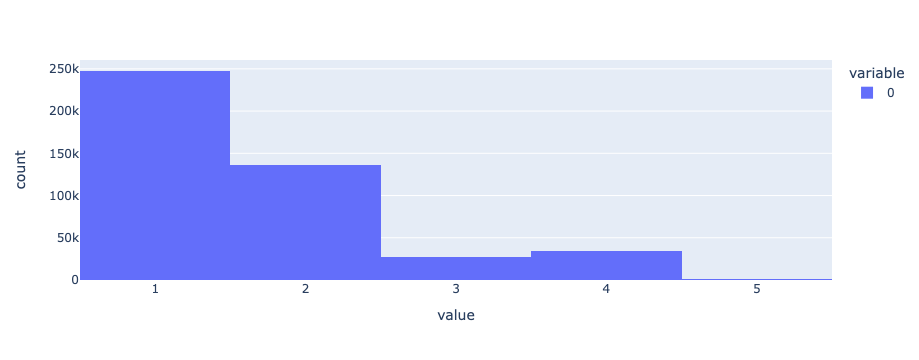

In [48]:
px.histogram(ratings)

In [49]:
import scipy.sparse as sparse 
import scipy.io as sio 

In [41]:
# saving data
m30 = np.asmatrix(df)
sm30 = sparse.csr_matrix(m30)
sio.mmwrite("sparse30.mtx", sm30)

In [ ]:
json.dump(reddit_data.tolist(), open("reddit_data30.json", "w"), indent=4)

In [50]:
m5 = np.asmatrix(df5)
sm5 = sparse.csr_matrix(m5)
sio.mmwrite("sparse5.mtx", sm5)

In [56]:
reddit_matrix5 = sio.mmread("sparse5.mtx")

In [57]:
reddit_matrix_coo = reddit_matrix5.tocoo()

In [58]:
df5.shape

(69478, 1595)

In [63]:
def random_sparse_matrix_split_csr(sparse_matrix, test_ratio=0.2, random_state=None):
    # Convert sparse matrix to COO format
    sparse_coo = sparse_matrix.tocoo()
    
    # Shuffle the indices and data
    if random_state is not None:
        np.random.seed(random_state)
    permutation = np.random.permutation(sparse_coo.nnz)
    shuffled_data = sparse_coo.data[permutation]
    shuffled_row = sparse_coo.row[permutation]
    shuffled_col = sparse_coo.col[permutation]
    
    # Determine the split indices for training and testing data
    split_index = int((1 - test_ratio) * sparse_coo.nnz)
    
    # Create training and testing sets
    train_data = shuffled_data[:split_index]
    train_row = shuffled_row[:split_index]
    train_col = shuffled_col[:split_index]
    test_data = shuffled_data[split_index:]
    test_row = shuffled_row[split_index:]
    test_col = shuffled_col[split_index:]
    
    # Create CSR matrices for training and testing sets
    train_matrix = sparse.csr_matrix((train_data, (train_row, train_col)), shape=sparse_matrix.shape)
    test_matrix = sparse.csr_matrix((test_data, (test_row, test_col)), shape=sparse_matrix.shape)
    
    return train_matrix, test_matrix

In [64]:
np.random.seed(42)
train_matrix_csr, test_matrix_csr = random_sparse_matrix_split_csr(reddit_matrix5, 
                                                                   test_ratio=0.2, random_state=42)

In [65]:
sio.mmwrite("sparse5_train.mtx", train_matrix_csr)
sio.mmwrite("sparse5_test.mtx", test_matrix_csr)

In [66]:
df5.head()

wikipedia.org  espn.com  yahoo.com  reuters.com  \
RidiculousKanji                   1         0          0            0   
teslamotors                       4         0          4            4   
phish                             4         0          2            0   
footballmanagergames              4         2          0            0   
wikipedia                         5         0          0            0   

                      sbs.com.au  cnn.com  engadget.com  blogspot.com  rt.com  \
RidiculousKanji                0        0             0             0       0   
teslamotors                    0        4             4             4       1   
phish                          0        0             0             3       0   
footballmanagergames           0        0             0             4       0   
wikipedia                      0        0             0             2       0   

                      theatlantic.com  ...  hpenews.com  dbrnews.com  \
RidiculousKanji                     0  ...            0            0   
teslamotors                         0  ...            0            0   
phish                               0  ...            0            0   
footballmanagergames                0  ...            0            0   
wikipedia                           0  ...            0            0   

                      theskimm.com  foxreno.com  sunlightfoundation.com  \
RidiculousKanji                  0            0                       0   
teslamotors                      0            0                       0   
phish                            0            0                       0   
footballmanagergames             0            0                       0   
wikipedia                        0            0                       0   

                      muncievoice.com  the-daily.buzz  thetowntalk.com  \
RidiculousKanji                     0               0                0   
teslamotors                         0               0                0   
phish                               0               0                0   
footballmanagergames                0               0                0   
wikipedia                           0               0                0   

                      sonorannews.com  worldpress.org  
RidiculousKanji                     0               0  
teslamotors                         0               0  
phish                               0               0  
footballmanagergames                0               0  
wikipedia                           0               0  

[5 rows x 1595 columns]

In [67]:
newssources5 = list(df5.index)

In [70]:
subreddits5 = list(df5.columns)
subreddits5[:3]

['wikipedia.org', 'espn.com', 'yahoo.com']

In [71]:
len(newssources5), len(subreddits5)

(69478, 1595)

In [72]:
json.dump(newssources5, open("newssources5.json", "w"), indent=4)
json.dump(subreddits5, open("subreddits5.json", "w"), indent=4)